In [1]:
# Predicing House Pricesing Using Linear Regression,Decision Tree,Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing data set

In [4]:
df_train=pd.read_csv("C:/Users/MOHIT/Downloads/train (2).csv")#importing training data set
df_test=pd.read_csv("C:/Users/MOHIT/Downloads/test.csv")#importing test data set

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.shape

(1460, 81)

In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df_test.shape

(1459, 80)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#visualisation

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

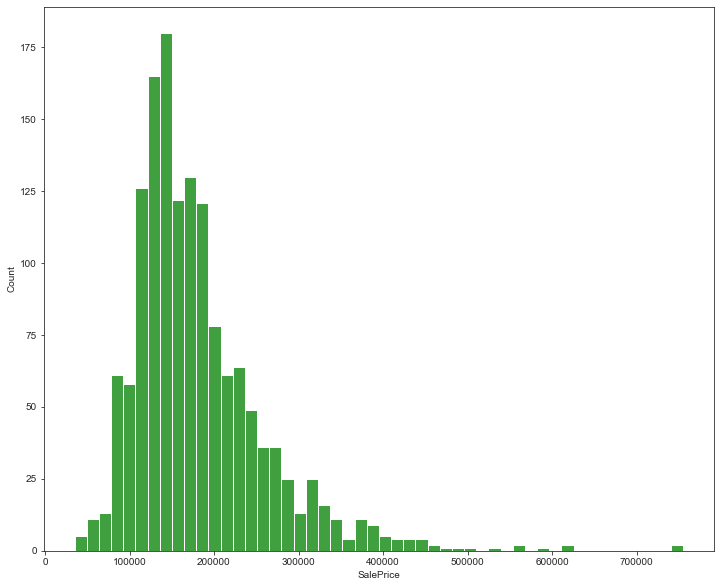

In [13]:
plt.figure(figsize=(12,10))
sns.set_style("ticks")
sns.histplot(data=df_train, x="SalePrice", bins=50,cbar=True ,color='g')

In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
print( df_train['SalePrice'].skew())
print( df_train['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


In [16]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

In [17]:
print( df_train['SalePrice'].skew())
print( df_train['SalePrice'].kurt())

0.12134661989685333
0.809519155707878


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

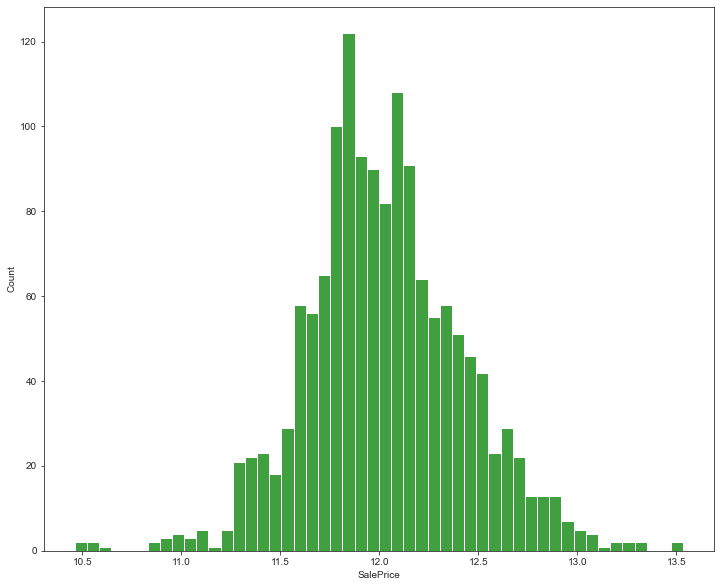

In [18]:
plt.figure(figsize=(12,10))
sns.set_style("ticks")
sns.histplot(data=df_train, x="SalePrice", bins=50,cbar=True ,color='g')

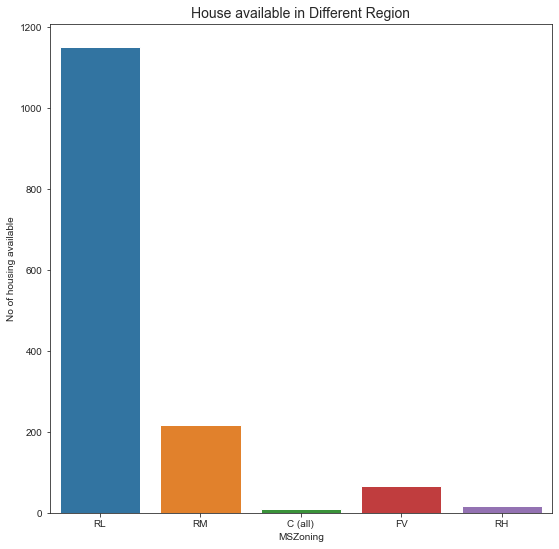

In [19]:
plt.figure(figsize=(9,9))
sns.countplot(data=df_train,x="MSZoning")
plt.title("House available in Different Region",fontsize=14)
plt.xlabel("MSZoning")
plt.ylabel("No of housing available")
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

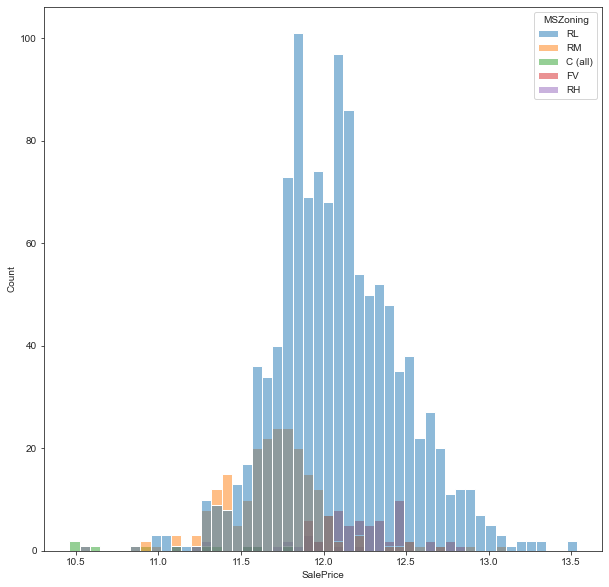

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(data=df_train, x="SalePrice",hue="MSZoning", bins=50,cbar=True ,color='g')

<Figure size 1296x720 with 0 Axes>

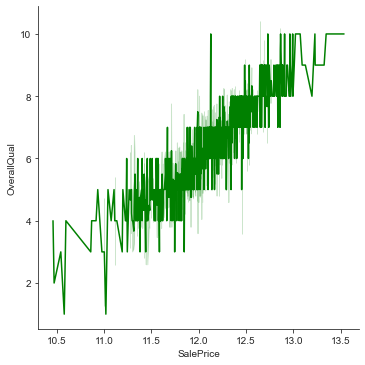

In [21]:
plt.figure(figsize=(18,10))
sns.relplot(x="SalePrice", y="OverallQual", data=df_train, palette="ch:r=-.5,l=.75",kind="line",ci="sd",color='g')

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

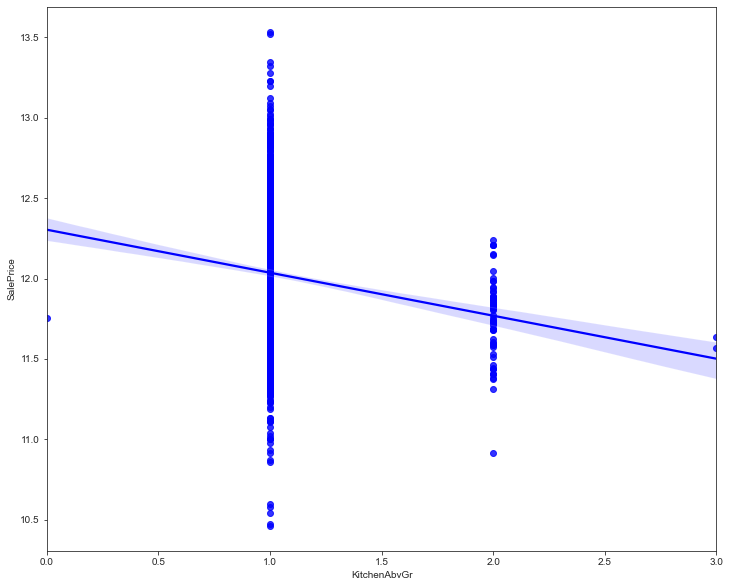

In [22]:
plt.figure(figsize=(12,10))
sns.regplot(x="KitchenAbvGr", y="SalePrice",data=df_train,color="blue")

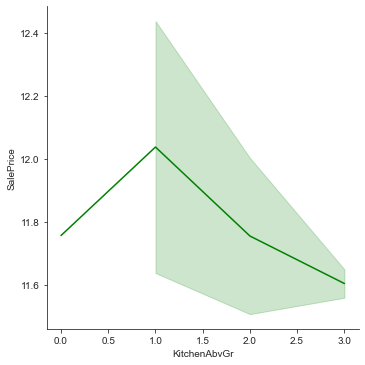

In [23]:
sns.relplot(x="KitchenAbvGr", y="SalePrice", data=df_train, palette="ch:r=-.5,l=.75",kind="line",ci="sd",color='g')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

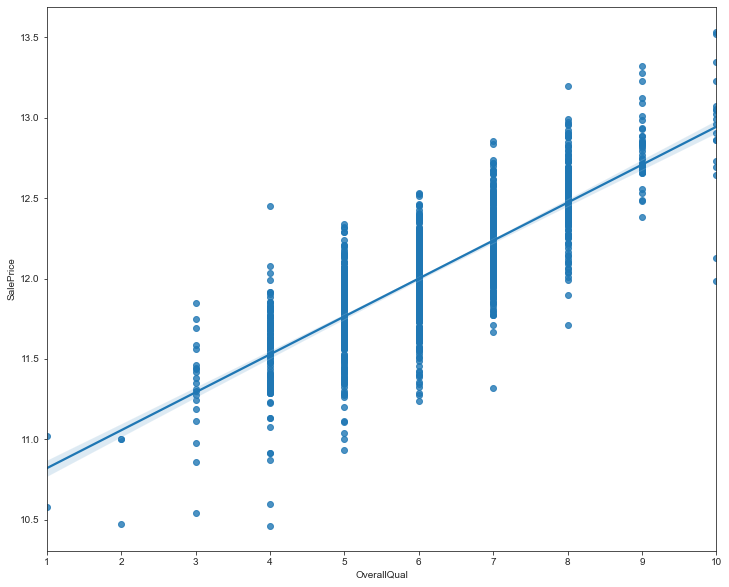

In [24]:
plt.figure(figsize=(12,10))
sns.regplot(x="OverallQual", y="SalePrice",data=df_train)

<AxesSubplot:>

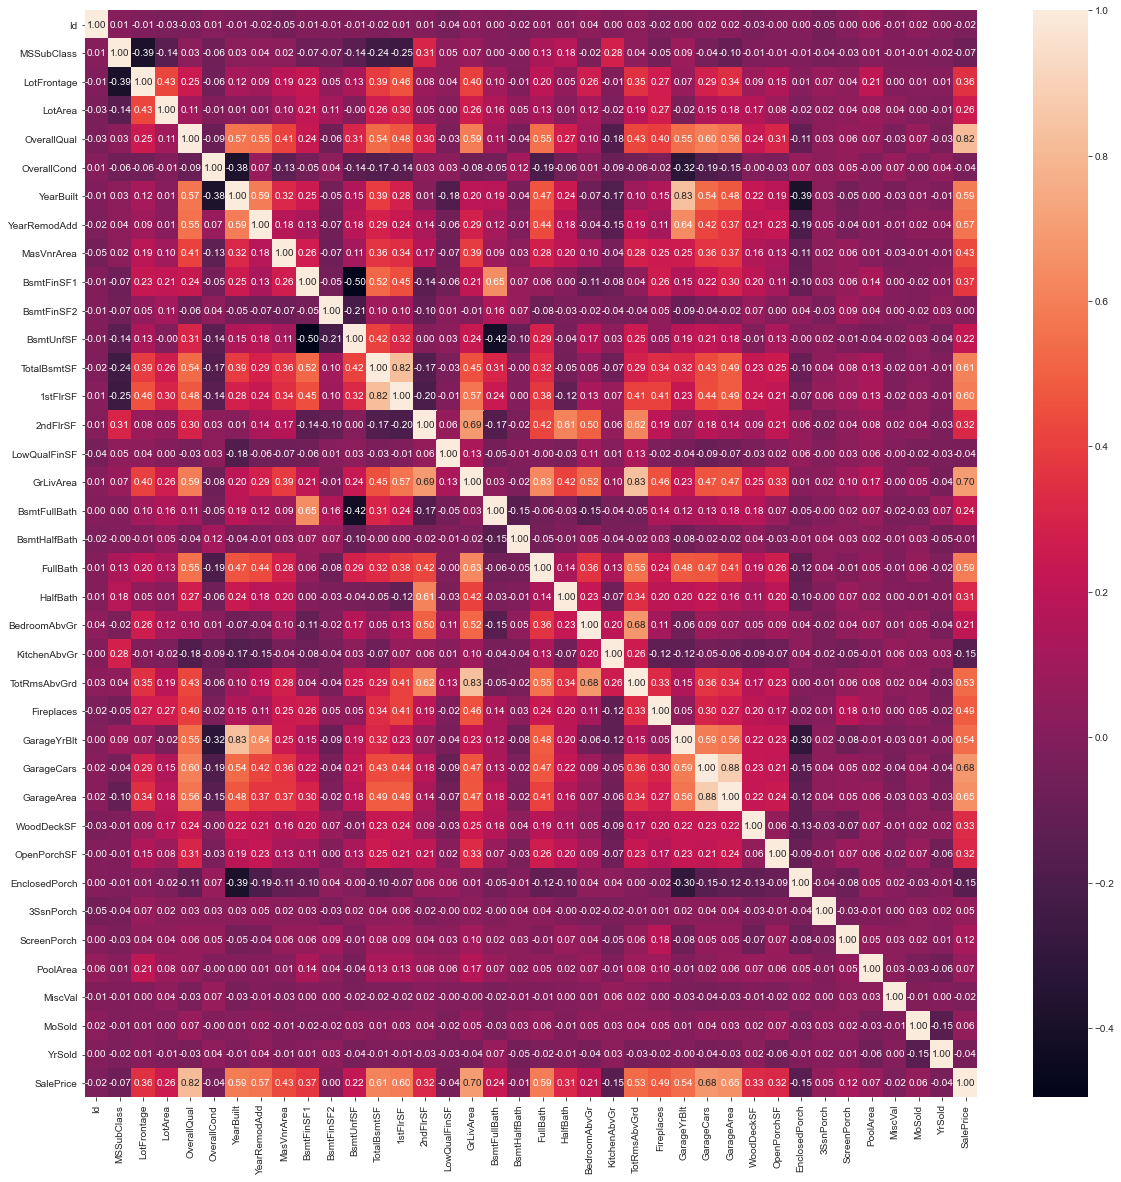

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,fmt="0.2f")

<AxesSubplot:xlabel='SalePrice'>

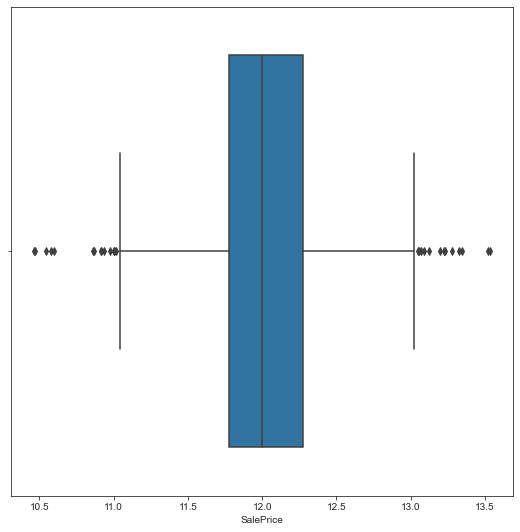

In [26]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df_train,x="SalePrice")

In [27]:
#cleaning data

In [28]:
df_train["LotFrontage"].isnull().sum()

259

In [29]:
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(),inplace=True)
df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(),inplace=True)

In [30]:
df_train.drop(["PoolQC","Alley","Fence","MiscFeature"],axis=1,inplace=True)


In [31]:
df_test.drop(["PoolQC","Alley","Fence","MiscFeature"],axis=1,inplace=True)

In [32]:
df_train["MasVnrType"].fillna("None",inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(),inplace=True)
df_train["BsmtQual"].fillna("TA",inplace=True)
df_train["BsmtCond"].fillna("TA",inplace=True)
df_train["BsmtExposure"].fillna("No",inplace=True)
df_train["BsmtFinType1"].fillna("Unf",inplace=True)
df_train["BsmtFinType2"].fillna("Unf",inplace=True)
df_train["FireplaceQu"].fillna("Gd",inplace=True)
df_train["GarageType"].fillna("Attchd",inplace=True)
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].median(),inplace=True)
df_train["GarageFinish"].fillna("Unf",inplace=True)
df_train["GarageQual"].fillna("TA",inplace=True)
df_train["GarageCond"].fillna("TA",inplace=True)
df_train["Electrical"].fillna("SBrkr",inplace=True)

In [33]:
df_test["MasVnrType"].fillna("None",inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(),inplace=True)
df_test["BsmtQual"].fillna("TA",inplace=True)
df_train["BsmtCond"].fillna("TA",inplace=True)
df_test["BsmtExposure"].fillna("No",inplace=True)
df_test["BsmtFinType1"].fillna("Unf",inplace=True)
df_test["BsmtFinType2"].fillna("Unf",inplace=True)
df_test["FireplaceQu"].fillna("Gd",inplace=True)
df_test["GarageType"].fillna("Attchd",inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].median(),inplace=True)
df_test["GarageFinish"].fillna("Unf",inplace=True)
df_test["GarageQual"].fillna("TA",inplace=True)
df_test["GarageCond"].fillna("TA",inplace=True)
df_test["BsmtCond"].fillna("TA",inplace=True)
df_test["MSZoning"].fillna("RL",inplace=True)
df_test["BsmtFullBath"].fillna(0.0,inplace=True)
df_test["Functional"].fillna("Typ",inplace=True)
df_test.dropna(inplace=True)

In [34]:
dataset=[df_train]
for data in dataset:
    data.loc[data["PoolArea"]>0,"pool_available"]=1
    data.loc[data["PoolArea"]==0,"pool_available"]=0
    data["pool_available"]=data["pool_available"].astype(int)
dataset=[df_test]
for data in dataset:
    data.loc[data["PoolArea"]>0,"pool_available"]=1
    data.loc[data["PoolArea"]==0,"pool_available"]=0
    data["pool_available"]=data["pool_available"].astype(int)
    

In [35]:
df_train=pd.get_dummies(data=df_train,columns=["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                'RoofStyle',  'MasVnrType', 'ExterQual', 
                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
df_train.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 'HouseStyle',
         'RoofMatl', 'Exterior1st',  'Heating', 'Electrical', 'Functional', 
        'GarageQual'],axis=1,inplace=True)

In [36]:
df_train.drop("Id",axis=1,inplace=True)
df_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
df_test=pd.get_dummies(data=df_test,columns=["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                'RoofStyle',  'MasVnrType', 'ExterQual', 
                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
df_test.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 'HouseStyle',
         'RoofMatl', 'Exterior1st',  'Heating', 'Electrical', 'Functional', 
        'GarageQual'],axis=1,inplace=True)

In [38]:
df_test.drop("Id",axis=1,inplace=True)
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
x=df_train.drop("SalePrice",axis=1)
y=df_train["SalePrice"]

In [40]:
#importing Libaries

In [41]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
#spliting the data

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=20)

In [44]:
# model_1 Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predictions1 = model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))

0.09230050883522016
0.017755465430265602
0.1332496357603487


<AxesSubplot:ylabel='SalePrice'>

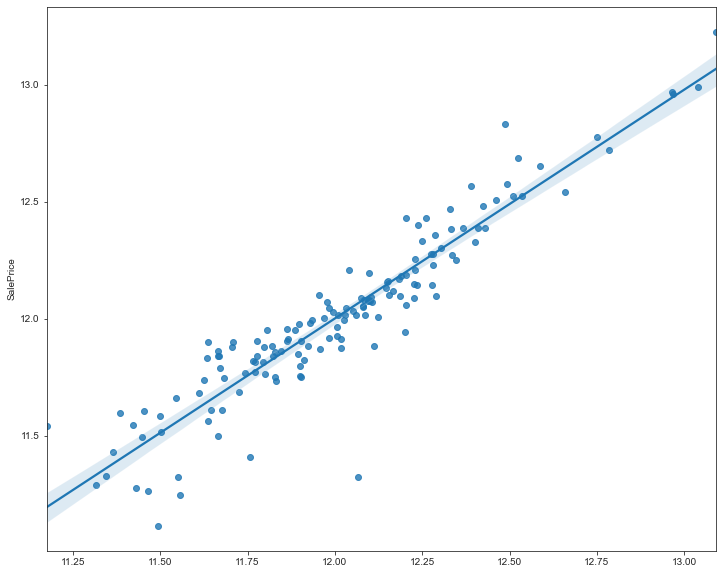

In [46]:
plt.figure(figsize=(12,10))
sns.regplot(predictions1,y_test)

In [47]:
# MOdel 2 Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree=DecisionTreeRegressor(random_state=0)
Decision_tree.fit(x_train,y_train)
predictions2 = Decision_tree.predict(x_test)
print(mean_absolute_error(y_test,predictions2))
print(mean_squared_error(y_test,predictions2))
print(np.sqrt(mean_squared_error(y_test,predictions2))) 

0.14467541844804155
0.04028245159194766
0.20070488681630963


In [49]:
accuracies = cross_val_score(estimator = Decision_tree, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.93 %
Standard Deviation: 5.59 %


In [50]:
# Model 3 Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)
predictions_rforest= random_forest.predict(x_test)
print(mean_absolute_error(y_test,predictions_rforest))
print(mean_squared_error(y_test,predictions_rforest))
print(np.sqrt(mean_squared_error(y_test,predictions_rforest)))
accuracies = cross_val_score(estimator = random_forest, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.09356303216784184
0.019341988651436166
0.13907547825348712
Accuracy: 87.05 %
Standard Deviation: 2.42 %


In [52]:
# From above three model Random Forest is more effective
# using random forest to predict the use sale

In [53]:
prediction_rforest=random_forest.predict(df_test)

In [54]:
prediction_rforest

array([11.72174738, 11.92815951, 12.10191544, ..., 11.91186604,
       11.62371822, 12.33905929])